In [20]:
# Set up interactive plotting using matplotlib, and load numpy
# %pylab ipympl
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to load a pipeline from a file.

## Setup

Make sure you have PODPAC installed with the **datatype** optional dependencies:

```
$ pip install podpac[datatype]
```

## Provide Earth Data Login Credentials
If you do not have an earth data login, or have not activated OpenDAP access, follow the [instructions here](https://creare-com.github.io/podpac-docs/user/earthdata.html)

In [2]:
import getpass
username = input("Username:");   password = getpass.getpass('Password:')

Username: mpuecker
Password: ··················


# 1: Set up and execute pipeline
## 1.0: Define the pipeline json

In [3]:
import ipywidgets as widgets
import podpac
from podpac.datalib import smap

In [7]:
value='''
{
    "nodes": {
        "SMAP_SPL4SMAU": {
            "node": "datalib.smap.SMAP",
            "attrs": {
                "base_url": "https://n5eil01u.ecs.nsidc.org/opendap/SMAP",
                "product": "SPL4SMAU",
                "version": 4
            },
            "interpolation": "nearest"
        }
    },
    "output": {
        "mode": "image",
        "format": "png"
    }
}                                 
'''
pipeline_json = widgets.Textarea(description='Pipeline Definition', 
                                 disabled=False, 
                                 layout=widgets.Layout(width='50%', height='400px'),
                                 placeholder='{}',
                                 value=value
                                )
pipeline_json

Textarea(value='\n{\n    "nodes": {\n        "SMAP_SPL4SMAU": {\n            "node": "datalib.smap.SMAP",\n   …

## 1.1: Create the pipeline

In [8]:
sm = podpac.pipeline.Pipeline(json=pipeline_json.value)

## 1.2: Set username and password for example node

In [9]:
sm.node.username = username
sm.node.password = password

## 1.3: Evaluate and plot the node for the world

In [13]:
# dim =            (start, stop, step)
lat = podpac.crange(   90,  -90,-2.0)
lon = podpac.crange( -180,  180, 2.0)
# dim = value
time = '2018-05-19T12'

c_world = podpac.Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])
o = sm.eval(c_world)

INFO:pydap:Fetching URL: https://n5eil02u.ecs.nsidc.org/opendap/SMAP/SPL4SMAU.004/2018.05.19/SMAP_L4_SM_aup_20180519T120000_Vv4030_001.h5.dods?Analysis_Data_sm_surface_analysis[0:1:1623][0:1:3855]


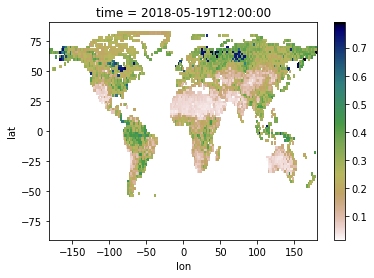

In [21]:
figure()
o.plot(cmap='gist_earth_r')